In [40]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
abc_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/CSVs/abc.csv')
fox_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/CSVs/fox.csv')
ny_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/CSVs/ny.csv')
tel_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/CSVs/tel.csv')

In [42]:
contractions = { 
    "ain't": "are not","'s":" is","aren't": "are not",
     "can't": "cannot","can't've": "cannot have",
     "'cause": "because","could've": "could have","couldn't": "could not",
     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
     "hasn't": "has not","haven't": "have not","he'd": "he would",
     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
     "it'd": "it would","it'd've": "it would have","it'll": "it will",
     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
     "mayn't": "may not","might've": "might have","mightn't": "might not", 
     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
     "mustn't've": "must not have", "needn't": "need not",
     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
     "she'll": "she will", "she'll've": "she will have","should've": "should have",
     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
     "there'd've": "there would have", "they'd": "they would",
     "they'd've": "they would have","they'll": "they will",
     "they'll've": "they will have", "they're": "they are","they've": "they have",
     "to've": "to have","wasn't": "was not","we'd": "we would",
     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
     "what'll've": "what will have","what're": "what are", "what've": "what have",
     "when've": "when have","where'd": "where did", "where've": "where have",
     "who'll": "who will","who'll've": "who will have","who've": "who have",
     "why've": "why have","will've": "will have","won't": "will not",
     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
     "y'all'd've": "you all would have","y'all're": "you all are",
     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
     "you'll": "you will","you'll've": "you will have", "you're": "you are",
     "you've": "you have"
}

In [43]:
#combining or csv into on df

df = pd.concat([abc_news,fox_news,ny_news,tel_news])
df.head(10)

,Title,Category,Article_url,Article
0,California Gov. Gavin Newsom pushes COVID-19 v...,politics,https://abcnews.go.com/Politics/california-gov...,California Gov. Gavin Newsom patiently waited ...
1,\n,politics,https://abcnews.go.com/Politics/video/blinken-...,NaN
2,"Fake German heiress taken into US custody, fac...",lifestyle,https://abcnews.go.com/Lifestyle/wireStory/fak...,NEW YORK -- U.S. authorities said Thursday t...
3,Blinken swipes at Trump administration in unve...,politics,https://abcnews.go.com/Politics/blinken-swipes...,Secretary of State Antony Blinken repudiated t...
4,\n,politics,https://abcnews.go.com/Politics/video/south-ca...,NaN
5,Civil rights groups sue Georgia over new votin...,politics,https://abcnews.go.com/Politics/civil-rights-g...,Civil rights groups on Tuesday said they have ...
6,1st news media allowed inside overcrowded migr...,politics,https://abcnews.go.com/Politics/1st-news-media...,The Biden administration for the first time on...
7,SolarWinds cyberhack gained access to then-act...,politics,https://abcnews.go.com/Politics/solarwinds-cyb...,Authorities believe that the massive alleged...
8,Can I still spread the coronavirus after I'm v...,lifestyle,https://abcnews.go.com/Lifestyle/wireStory/spr...,NEW YORK -- Can I still spread the after I’m...
9,Vaccine passport efforts draw opposition from ...,lifestyle,https://abcnews.go.com/Lifestyle/wireStory/vac...,"HARRISBURG, Pa. -- Vaccine passports being dev..."


In [44]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 125
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        435 non-null    object
 1   Category     493 non-null    object
 2   Article_url  493 non-null    object
 3   Article      477 non-null    object
dtypes: object(4)
memory usage: 19.3+ KB


Title          58
Category        0
Article_url     0
Article        16
dtype: int64

Data Exploration

In [45]:
df.head(5)

,Title,Category,Article_url,Article
0,California Gov. Gavin Newsom pushes COVID-19 v...,politics,https://abcnews.go.com/Politics/california-gov...,California Gov. Gavin Newsom patiently waited ...
1,\n,politics,https://abcnews.go.com/Politics/video/blinken-...,NaN
2,"Fake German heiress taken into US custody, fac...",lifestyle,https://abcnews.go.com/Lifestyle/wireStory/fak...,NEW YORK -- U.S. authorities said Thursday t...
3,Blinken swipes at Trump administration in unve...,politics,https://abcnews.go.com/Politics/blinken-swipes...,Secretary of State Antony Blinken repudiated t...
4,\n,politics,https://abcnews.go.com/Politics/video/south-ca...,NaN


In [46]:
art = ['style','lifestyle']
sports = ['sport']

df['Category'] = df['Category'].apply(lambda x: 'art 'if x in art else ('sports' if x in sports else(x)) )

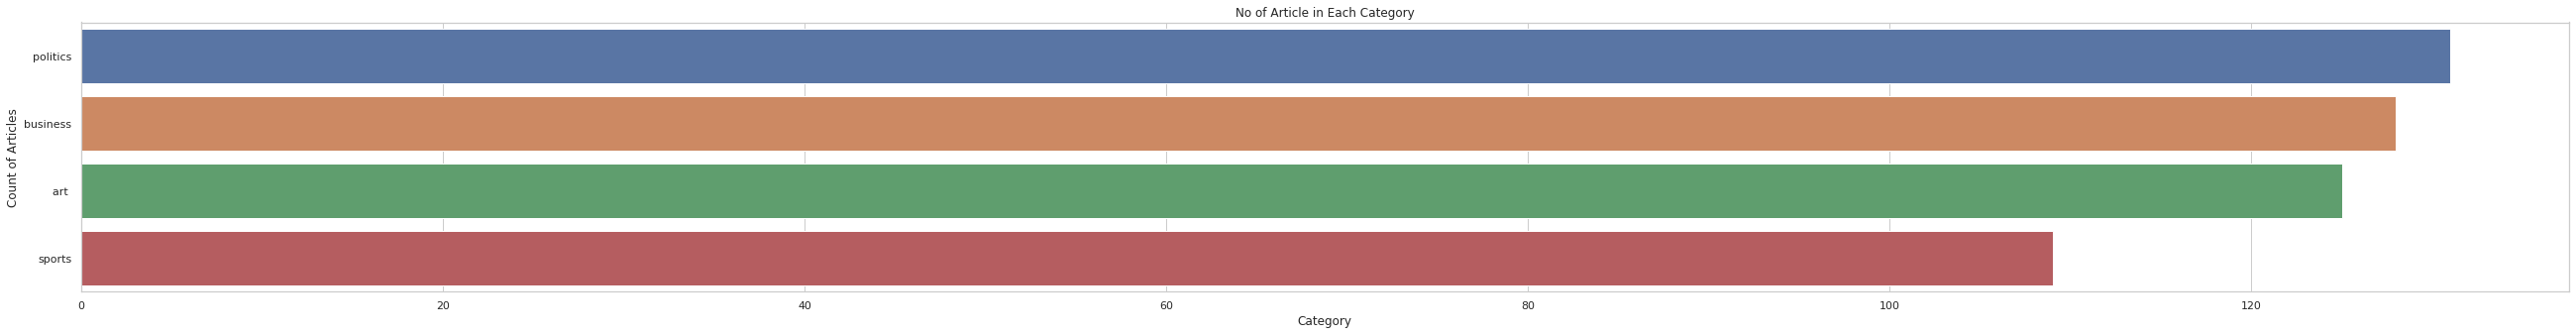

In [47]:
  # data visualisations of various categories
sns.set_theme(style="whitegrid")
plt.xlabel('Categories')
plt.ylabel('Count of Articles')
plt.title("No of Article in Each Category")
sns.barplot(x=df.Category.value_counts(), y=df.Category.value_counts().index)
sns.set(rc={'figure.figsize':(45,5)})

In [48]:
df['Category'].value_counts()

politics    131
business    128
art         125
sports      109
Name: Category, dtype: int64

In [49]:
df.Category.unique()

array(['politics', 'art ', 'business', 'sports'], dtype=object)

In [50]:
df = df.dropna()
df.isnull().sum()
df = df.reset_index(drop=True)

Data Preprocessing

In [51]:
#libraries| 
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'com','the ','www','the','you','an','via','it','in','are','let','subject','to', 'they','re', 'edu', 'use', 'the','https', 'will', 'thee', 'one', 'an', 'really', 'even', 'take','lot', 'nan','take','want' 'take',])

In [53]:
from nltk import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import re

def preprocess_news(article):
    words = []

    for word in article.split():
        word = contractions.get(word.lower(), word)
        # Remove stopwords
        if word not in stop_words:
            # print(word)

            word = re.sub(r'http\S+', '', word)

            emoji_clean = re.compile("["
                                     u"\U0001F600-\U0001F64F"  # emoticons
                                     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                     u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                     u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                     u"\U00002702-\U000027B0"
                                     u"\U000024C2-\U0001F251"
                                     "]+", flags=re.UNICODE)
            word = emoji_clean.sub(r'', word)

            # Remove punctuation
            word = re.sub(r'[^\w\s]', '', word)

            # word = lemmatizer.lemmatize(word, pos='v')

            # Convert to lowercase
            word = word.lower()

            if word != '':
                words.append(word)

    return ' '.join([word for word in words])

In [54]:
df['Article'] = df['Article'].apply(lambda x: preprocess_news(x))

In [55]:
#xploration of cleaned news content
d_words =df.Article.to_list()
d_words

['california gov gavin newsom patiently waited day californians 50 older became eligible covid19 vaccination thursday received dose johnson johnson vaccine newsom told abc news zohreen shah exclusive interview thrilled one done recalled first vaccine administered southern california nurse helen cordova dec 14 eighteen million doses later finally turn said today we are making eligible everyone 50 over in two weeks everybody 16 over we supply now newsom received vaccine hardhit south los angeles emphasize vaccine equity community thats suffered immensely throughout coronavirus pandemic according data centers disease control prevention california reported coronavirus cases 357 million virusrelated deaths 58269 state in los angeles county residents identifying hispanic latino accounted approximately 53 covid19related deaths despite accounting 486 population this work focused mindful issue equity platform promotion promise newsom said its tough its gritty work its hard its stubborn we know 

In [56]:
# article words exploration

d= df.Article.to_list()
data_words = d
print(data_words[:1])

['california gov gavin newsom patiently waited day californians 50 older became eligible covid19 vaccination thursday received dose johnson johnson vaccine newsom told abc news zohreen shah exclusive interview thrilled one done recalled first vaccine administered southern california nurse helen cordova dec 14 eighteen million doses later finally turn said today we are making eligible everyone 50 over in two weeks everybody 16 over we supply now newsom received vaccine hardhit south los angeles emphasize vaccine equity community thats suffered immensely throughout coronavirus pandemic according data centers disease control prevention california reported coronavirus cases 357 million virusrelated deaths 58269 state in los angeles county residents identifying hispanic latino accounted approximately 53 covid19related deaths despite accounting 486 population this work focused mindful issue equity platform promotion promise newsom said its tough its gritty work its hard its stubborn we know 

In [57]:
import gensim
from wordcloud import WordCloud

In [58]:
def sent_to_words(words):
    for sentence in words:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

In [59]:
data_words = list(sent_to_words(d))
print(data_words[:1])

list_words = []
for i in data_words:
    for j in i:
        list_words.append(j)



[['california', 'gov', 'gavin', 'newsom', 'patiently', 'waited', 'day', 'californians', 'older', 'became', 'eligible', 'covid', 'vaccination', 'thursday', 'received', 'dose', 'johnson', 'johnson', 'vaccine', 'newsom', 'told', 'abc', 'news', 'zohreen', 'shah', 'exclusive', 'interview', 'thrilled', 'one', 'done', 'recalled', 'first', 'vaccine', 'administered', 'southern', 'california', 'nurse', 'helen', 'cordova', 'dec', 'eighteen', 'million', 'doses', 'later', 'finally', 'turn', 'said', 'today', 'we', 'are', 'making', 'eligible', 'everyone', 'over', 'in', 'two', 'weeks', 'everybody', 'over', 'we', 'supply', 'now', 'newsom', 'received', 'vaccine', 'hardhit', 'south', 'los', 'angeles', 'emphasize', 'vaccine', 'equity', 'community', 'thats', 'suffered', 'immensely', 'throughout', 'coronavirus', 'pandemic', 'according', 'data', 'centers', 'disease', 'control', 'prevention', 'california', 'reported', 'coronavirus', 'cases', 'million', 'virusrelated', 'deaths', 'state', 'in', 'los', 'angeles'

In [60]:
len(list_words)

198715

In [61]:
from collections import Counter

In [62]:
count_each_word = Counter(list_words)
count_each_word
# print(count_each_word.most_common(100))

Counter({'california': 49,
         'gov': 44,
         'gavin': 1,
         'newsom': 9,
         'patiently': 2,
         'waited': 10,
         'day': 323,
         'californians': 1,
         'older': 67,
         'became': 77,
         'eligible': 14,
         'covid': 272,
         'vaccination': 67,
         'thursday': 112,
         'received': 70,
         'dose': 33,
         'johnson': 123,
         'vaccine': 228,
         'told': 235,
         'abc': 86,
         'news': 206,
         'zohreen': 1,
         'shah': 24,
         'exclusive': 13,
         'interview': 59,
         'thrilled': 8,
         'one': 183,
         'done': 95,
         'recalled': 18,
         'first': 508,
         'administered': 20,
         'southern': 31,
         'nurse': 5,
         'helen': 3,
         'cordova': 1,
         'dec': 9,
         'eighteen': 2,
         'million': 219,
         'doses': 60,
         'later': 132,
         'finally': 36,
         'turn': 44,
         'said': 23

In [63]:
for token in list_words:
    if token in stop_words:
         list_words.remove(token)

In [64]:
len(list_words)

185635

In [65]:
freq = nltk.FreqDist(list_words)
freq

FreqDist({'california': 49,
          'gov': 44,
          'gavin': 1,
          'newsom': 9,
          'patiently': 2,
          'waited': 10,
          'day': 323,
          'californians': 1,
          'older': 67,
          'became': 77,
          'eligible': 14,
          'covid': 272,
          'vaccination': 67,
          'thursday': 112,
          'received': 70,
          'dose': 33,
          'johnson': 123,
          'vaccine': 228,
          'told': 235,
          'abc': 86,
          'news': 206,
          'zohreen': 1,
          'shah': 24,
          'exclusive': 13,
          'interview': 59,
          'thrilled': 8,
          'done': 95,
          'recalled': 18,
          'first': 508,
          'administered': 20,
          'southern': 31,
          'nurse': 5,
          'helen': 3,
          'cordova': 1,
          'dec': 9,
          'eighteen': 2,
          'million': 219,
          'doses': 60,
          'later': 132,
          'finally': 36,
          'turn': 44,

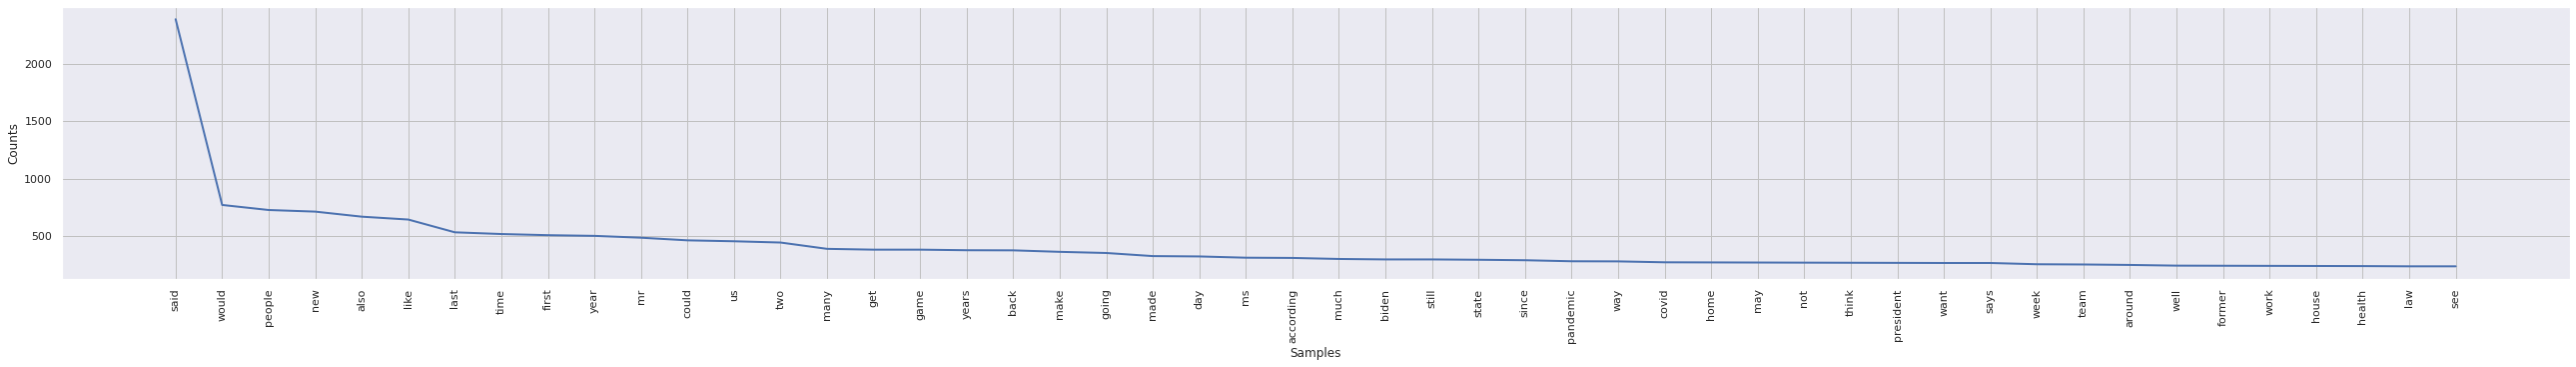

In [66]:
freq.plot(50, cumulative=False)

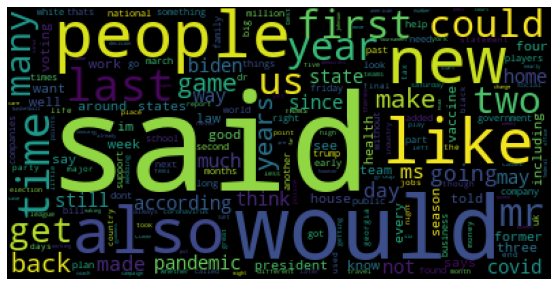

In [67]:
word_could_dict=Counter(list_words)
wordcloud = WordCloud().generate_from_frequencies(word_could_dict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Feature Engineering

In [68]:
!pip install sklearn

In [69]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [70]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_article = tfidf_vectorizer.fit_transform(df['Article'])

pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

In [71]:
tfidf_pca = PCA(n_components = 2) 
tfidf_pca_comp = tfidf_pca.fit_transform(tfidf_article.toarray())

In [72]:
pickle.dump(tfidf_pca, open('tfidf_pca.pkl', 'wb'))

In [73]:
from sklearn.cluster import KMeans

In [74]:
k_means = KMeans(n_clusters=7)
k_means.fit(tfidf_pca_comp)
pred=k_means.predict(tfidf_pca_comp)

In [75]:
pred

array([3, 0, 6, 5, 3, 3, 3, 6, 6, 6, 6, 6, 3, 0, 0, 0, 2, 3, 3, 3, 6, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 2, 6, 0, 3, 3, 0, 6, 3,
       0, 3, 3, 6, 6, 3, 3, 5, 0, 3, 3, 6, 6, 3, 6, 5, 3, 3, 3, 3, 4, 4,
       0, 4, 4, 1, 0, 1, 0, 4, 4, 4, 5, 0, 4, 4, 1, 0, 1, 4, 4, 0, 1, 4,
       4, 0, 4, 0, 1, 5, 1, 4, 1, 4, 4, 4, 4, 4, 0, 0, 1, 0, 1, 0, 4, 4,
       1, 1, 6, 1, 4, 2, 6, 6, 6, 2, 0, 6, 6, 6, 2, 6, 3, 2, 6, 0, 6, 6,
       2, 6, 3, 3, 6, 0, 6, 0, 2, 3, 6, 2, 6, 6, 2, 6, 2, 5, 5, 0, 6, 6,
       6, 0, 0, 5, 0, 0, 6, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 3, 4, 0, 0, 0,
       5, 0, 0, 4, 0, 4, 4, 0, 4, 4, 1, 4, 4, 5, 4, 0, 0, 5, 0, 1, 0, 5,
       1, 5, 1, 0, 6, 6, 5, 6, 0, 6, 6, 6, 6, 3, 5, 6, 6, 5, 6, 0, 4, 5,
       6, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 1, 4, 4, 5,

In [76]:
pickle.dump( k_means, open('kmeans_model.pkl', 'wb'))

In [77]:
df['Clusters'] = pred

df.to_csv('news_cluster.csv', index=False)